kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2019년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [234]:
# 상반기, 하반기 주유소 가격 데이터 조회
import pandas as pd
oil_1 = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding = 'cp949')
oil_2 = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding = 'cp949')

In [235]:
# 상반기, 하반기 DataFrame 합치기
oil = pd.concat([oil_1, oil_2])
oil

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0
...,...,...,...,...,...,...,...,...,...,...,...
81788,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
81789,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
81790,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
81791,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0


In [18]:
# DataFrame 기본 정보 조회
oil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164482 entries, 0 to 81792
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 15.1+ MB


In [19]:
# 상표 컬럼의 고유값 조회
oil['상표'].unique()

array(['SK에너지', 'GS칼텍스', '현대오일뱅크', 'S-OIL', '알뜰주유소', '자가상표', '알뜰(ex)'],
      dtype=object)

In [20]:
# 지역 컬럼의 고유값 조회
oil['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [236]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)
a = oil['지역'].str.split(' ')
loca = a.str[1]
oil['구'] = loca
oil

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
81788,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0,중랑구
81789,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0,중랑구
81790,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0,중랑구
81791,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0,중랑구


In [237]:
# 기간 컬럼을 datetime 타입으로 변경
oil['기간'] = pd.to_datetime(oil['기간'], format = '%Y%m%d')
oil

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...
81788,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구
81789,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구
81790,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구
81791,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구


In [238]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
oil['월'] = oil['기간'].dt.month
oil['일'] = oil['기간'].dt.day
oil['요일'] = oil['기간'].dt.weekday
oil

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81788,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-27,GS칼텍스,셀프,0,1525,1745,0,중랑구,12,27,1
81789,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-28,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,28,2
81790,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-29,GS칼텍스,셀프,0,1525,1720,0,중랑구,12,29,3
81791,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),2022-12-30,GS칼텍스,셀프,0,1515,1715,0,중랑구,12,30,4


In [ ]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경


In [92]:
# 휘발유 가격이 가장 비싼 5개 행 조회
oil.sort_values(by = '휘발유', ascending = False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,2
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,6
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,4
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,3
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-27,SK에너지,일반,3496,3096,3223,2719,중구,6,27,0


In [100]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
oil[oil['휘발유'] != 0].sort_values(by='휘발유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
16809,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,1
15150,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,5
15151,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-25,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,25,6
65744,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,0
15149,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,4


In [94]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
oil.sort_values(by = '고급휘발유', ascending = False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78940,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-27,SK에너지,일반,3496,3096,3223,2719,중구,6,27,0
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,6
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,5
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,4
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,3


In [101]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
oil[oil['고급휘발유'] != 0].sort_values(by='고급휘발유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
15882,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,1
15883,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,2
15884,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,3
15885,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,4
15886,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-24,S-OIL,셀프,1599,1499,1729,0,강서구,12,24,5


In [103]:
# 경유 가격이 가장 비싼 5개 행 조회
oil.sort_values(by = '경유', ascending = False).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,6,29,2
77929,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,7,1,4
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,1
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,3
77932,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-04,SK에너지,일반,3481,3081,3230,2703,중구,7,4,0


In [104]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
oil[oil['경유'] != 0].sort_values(by = '경유').head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,1,16,6
12343,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-11,알뜰주유소,일반,0,1547,1377,0,강서구,1,11,1
12344,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-12,알뜰주유소,일반,0,1547,1377,0,강서구,1,12,2
12345,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-01-13,알뜰주유소,일반,0,1547,1377,0,강서구,1,13,3
16318,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-01-06,알뜰주유소,셀프,0,1547,1377,0,강서구,1,6,3


In [249]:
# 상표별 휘발유 평균가격 조회
gb = oil.groupby('상표')['휘발유'].mean()
gb

상표
GS칼텍스     1904.899429
S-OIL     1859.282595
SK에너지     1908.900823
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
Name: 휘발유, dtype: float64

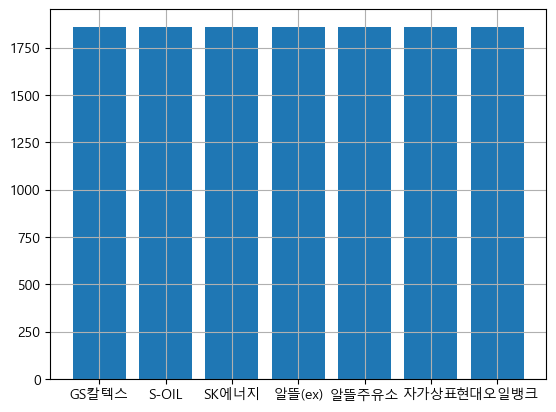

In [250]:
# 상표별 휘발유 평균가격 시각화
import matplotlib.pyplot as plt

plt.bar(gb.index, gb[1])

plt.grid(True)
plt.show()

In [137]:
# 셀프주유소와 일반주유소 개수 확인
oil['셀프여부'].value_counts()

셀프    92478
일반    72004
Name: 셀프여부, dtype: int64

In [251]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 
oil.groupby('셀프여부')['휘발유'].mean()

셀프여부
셀프    1818.216376
일반    1953.870993
Name: 휘발유, dtype: float64

In [241]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교
gb2 =  oil.groupby(['상표', '셀프여부'])['휘발유'].mean()
gb2
pt = oil.pivot_table(index = '상표', columns = '셀프여부', values = '휘발유', aggfunc = 'mean')
pt.fillna = 0
pt

셀프여부,셀프,일반
상표,,
GS칼텍스,1825.849350,2001.420217
S-OIL,1820.122748,1932.115939
SK에너지,1826.717027,2003.229520
알뜰(ex),1759.884932,NaN
알뜰주유소,1754.261378,1796.201557
자가상표,2017.000000,1821.768493
현대오일뱅크,1807.265898,1877.606059


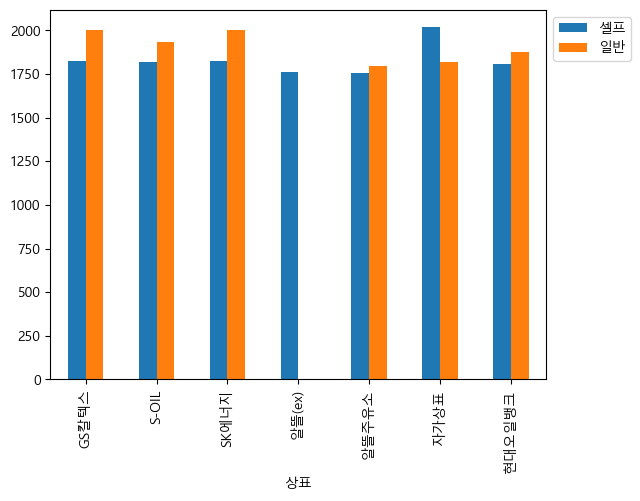

In [246]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화

pt.plot(kind = 'bar')

plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.show()

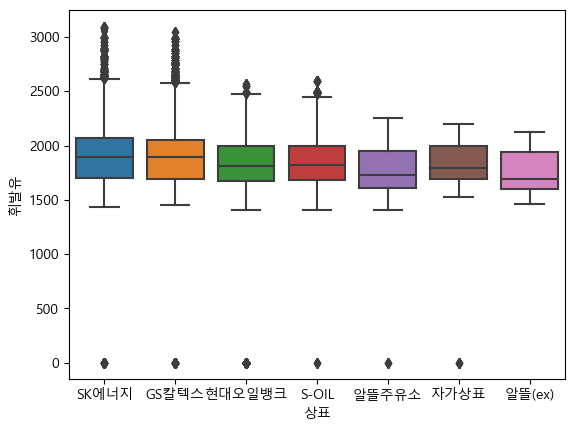

In [270]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화
import seaborn as sns

sns.boxplot(x = '상표', y = '휘발유', data = oil)

plt.show()

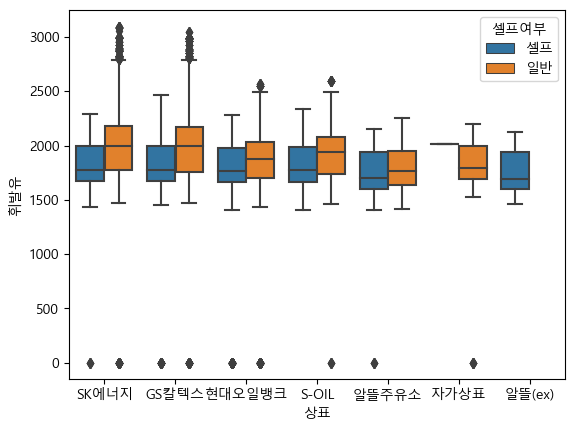

In [274]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화

sns.boxplot(x = '상표', y = '휘발유', hue = '셀프여부', data = oil)

plt.show()

In [294]:
# 구별 휘발유 가격의 평균
gb3 = oil.groupby('구')['휘발유'].mean().sort_values(ascending = False)
gb3

구
용산구     2203.392495
중구      2149.957178
종로구     2129.215029
강남구     2024.210946
성동구     1923.009324
강동구     1910.691977
서초구     1902.345027
마포구     1880.027429
구로구     1864.676733
영등포구    1863.848380
관악구     1851.051724
노원구     1845.411765
송파구     1843.436830
동작구     1836.980792
강서구     1829.297928
동대문구    1825.329176
은평구     1821.937317
서대문구    1818.858735
광진구     1818.287644
중랑구     1805.788631
성북구     1805.115935
도봉구     1800.197597
양천구     1799.875541
금천구     1799.263339
강북구     1787.319507
Name: 휘발유, dtype: float64

In [305]:
# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격
oil[oil['구'] == gb3.index[0]].groupby('상표')['휘발유'].mean()

상표
GS칼텍스     2386.086653
SK에너지     2245.048402
현대오일뱅크    2013.058905
Name: 휘발유, dtype: float64

In [306]:
# 월 평균 휘발유 가격
oil.groupby('월')['휘발유'].mean()

월
1     1704.975625
2     1781.803959
3     2007.941288
4     2030.140766
5     2027.255552
6     2151.490272
7     2082.667822
8     1858.737602
9     1799.546203
10    1737.285143
11    1715.447874
12    1627.068857
Name: 휘발유, dtype: float64

In [309]:
# 각 구의 월별 평균 휘발유 가격 
gb4 = oil.groupby(['구', '월'])['휘발유'].mean()
gb4

구    월 
강남구  1     1845.037951
     2     1914.714286
     3     2109.476510
     4     2138.078788
     5     2137.114674
              ...     
중랑구  8     1773.062035
     9     1717.466667
     10    1654.116625
     11    1629.458974
     12    1566.585608
Name: 휘발유, Length: 300, dtype: float64

In [327]:
pt4 = oil.pivot_table(index = '월', columns = '구', values = '휘발유', aggfunc = 'mean')
pt4

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1,1845.037951,1732.289294,1599.384615,1657.352823,1693.370370,1643.827586,1679.963134,1643.854839,1671.234914,1613.964158,...,1734.804554,1632.611559,1678.787909,1633.020645,1700.583035,2046.389578,1641.127016,1924.910394,2002.511401,1624.843318
2,1914.714286,1797.400510,1692.991758,1744.524554,1767.613811,1733.171838,1754.278912,1718.961310,1749.078571,1702.603175,...,1810.227848,1715.837798,1741.297991,1711.940000,1777.378486,2119.343407,1714.379464,1995.059524,2073.921429,1714.377551
3,2109.476510,2020.053118,1954.910670,1968.371976,1992.619816,1965.270968,2005.556068,1947.865889,1981.651613,1964.155009,...,2042.379507,1961.168011,1967.725806,1943.258065,2006.050179,2266.325062,1956.024194,2193.612000,2235.391586,1948.587963
4,2138.078788,2075.559524,1968.938462,1994.076042,2012.595238,1975.047281,2035.069467,1948.887879,2007.235556,1974.970894,...,2078.880392,1978.133333,2001.121212,1962.068091,2035.384123,2267.592308,1984.841667,2230.095833,2182.416667,1977.856802
5,2137.114674,2055.983871,1946.035230,1989.009073,1986.184758,1959.891705,2015.151613,1941.687316,2007.703226,1958.483871,...,2060.633776,1957.707586,1991.337796,1954.148387,2027.461722,2387.131514,1966.931452,2252.173387,2325.951613,1954.359903
6,2273.512745,2174.080952,2077.157576,2118.266180,2117.292857,2096.482014,2132.770000,2081.944444,2117.348889,2086.650000,...,2190.382353,2088.650725,2115.770721,2084.834446,2143.571605,2471.287179,2087.960417,2350.654167,2434.632997,2076.310256
7,2223.274194,2125.896313,1976.936986,2037.915992,2061.854839,2018.152074,2078.689935,1998.354839,2070.651613,2002.050403,...,2139.177645,2012.291961,2056.817227,2004.267097,2056.821983,2381.947631,2028.060484,2327.391129,2331.203226,2022.888337
8,2013.865275,1910.246544,1756.037634,1814.660137,1829.476959,1785.532258,1854.947798,1788.944282,1829.000000,1774.889113,...,1915.363071,1772.318373,1826.300000,1773.624516,1836.010778,2165.801489,1804.530242,2158.129032,2137.106452,1773.062035
9,1965.875000,1829.524038,1692.447222,1744.274747,1778.404306,1734.718670,1786.936667,1731.793939,1767.555556,1712.797917,...,1848.378661,1709.307246,1758.666667,1715.977303,1767.259305,2130.389744,1738.691667,2110.458333,2100.513333,1717.466667


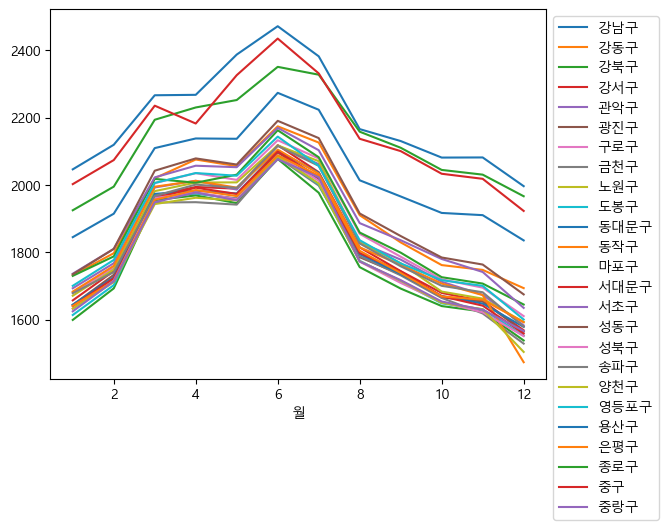

In [330]:
# 각 구의 월별 평균가격의 변화추이 시각화

pt4.plot()

plt.legend(bbox_to_anchor = (1, 1), loc = 'upper left')
plt.show()

In [336]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
oil.sort_values('휘발유', ascending = False).drop_duplicates('상호').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,2
72549,A0000925,서울 용산구,서계주유소,서울 용산구 청파로 367 (청파동),2022-06-28,GS칼텍스,일반,3450,3050,3025,0,용산구,6,28,1
80019,A0009047,서울 중구,필동주유소,서울 중구 퇴계로 196 (필동2가),2022-06-23,GS칼텍스,일반,2999,2789,2959,2349,중구,6,23,3
72360,A0000223,서울 용산구,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2022-06-20,SK에너지,일반,2990,2690,2680,1890,용산구,6,20,0
73266,A0000221,서울 용산구,한석주유소,서울 용산구 이촌로 164,2022-06-21,SK에너지,일반,2964,2681,2893,0,용산구,6,21,1


In [341]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)
oil[oil['휘발유'] != 0].sort_values('휘발유').drop_duplicates('번호').head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
16809,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-27,알뜰주유소,셀프,0,1410,1660,0,강서구,12,27,1
15150,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,5
65744,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-26,S-OIL,셀프,0,1410,1660,0,양천구,12,26,0
12609,A0004657,서울 강서구,뉴신정주유소,서울 강서구 곰달래로 207 (화곡동),2022-12-22,알뜰주유소,일반,0,1415,1665,0,강서구,12,22,3
13529,A0000582,서울 강서구,목화주유소,서울 강서구 국회대로 251 (화곡동),2022-12-22,알뜰주유소,셀프,0,1430,1670,0,강서구,12,22,3


In [350]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates)
oil.sort_values('휘발유', ascending = False).drop_duplicates('상호').head()[['상호', '지역', '주소']]

,상호,지역,주소
78935,서남주유소,서울 중구,서울 중구 통일로 30
72549,서계주유소,서울 용산구,서울 용산구 청파로 367 (청파동)
80019,필동주유소,서울 중구,서울 중구 퇴계로 196 (필동2가)
72360,동자동주유소,서울 용산구,서울 용산구 한강대로104길 6 (동자동)
73266,한석주유소,서울 용산구,서울 용산구 이촌로 164


In [358]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)
oil[oil['휘발유'] != 0].sort_values('휘발유').drop_duplicates('번호').head(5)[['상호', '지역', '주소']]

,상호,지역,주소
16809,화곡역주유소,서울 강서구,서울 강서구 강서로 154 (화곡동)
15150,이케이에너지(주) 강서주유소,서울 강서구,서울 강서구 화곡로 273 (화곡동)
65744,현대주유소,서울 양천구,서울 양천구 남부순환로 372 (신월동)
12609,뉴신정주유소,서울 강서구,서울 강서구 곰달래로 207 (화곡동)
13529,목화주유소,서울 강서구,서울 강서구 국회대로 251 (화곡동)


In [372]:
# 고급 휘발유를 가장 많이 파는 구 조회
oil.groupby('구')['고급휘발유'].count()

구
강남구     12278
강동구      5110
강북구      4460
강서구     11825
관악구      5104
광진구      5107
구로구      7384
금천구      4067
노원구      5474
도봉구      5992
동대문구     6574
동작구      3436
마포구      4375
서대문구     5472
서초구     11231
성동구      6006
성북구      8522
송파구     11295
양천구      9015
영등포구     9814
용산구      4637
은평구      5807
종로구      2981
중구       3643
중랑구      4873
Name: 고급휘발유, dtype: int64

In [ ]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################
